In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [81]:
#Get the data
df = web.DataReader('USDTRY=X', data_source='yahoo', start='2001-01-01', end='2020-05-13')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1.34550,1.33680,1.34550,1.34400,0.0,1.34400
2005-01-04,1.35100,1.33680,1.33680,1.35100,0.0,1.35100
2005-01-05,1.38650,1.35450,1.35450,1.37400,0.0,1.37400
2005-01-06,1.40580,1.37800,1.37800,1.39250,0.0,1.39250
2005-01-07,1.39400,1.36150,1.38700,1.39400,0.0,1.39400
...,...,...,...,...,...,...
2020-05-06,7.26682,7.07557,7.19672,7.19708,0.0,7.19708
2020-05-07,7.16700,7.07586,7.09350,7.08830,0.0,7.08830
2020-05-10,7.10340,7.05954,7.08320,7.09400,0.0,7.09400


In [82]:
#Get the number of rows and columns in the dataset
df.shape

(3993, 6)

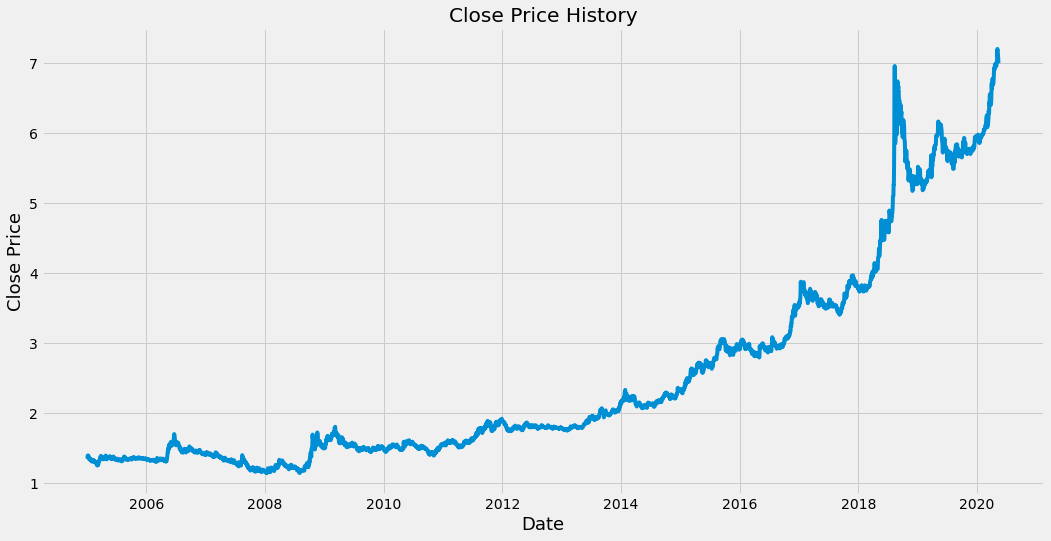

In [83]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [84]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

3195

In [85]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03331252],
       [0.03446862],
       [0.03826728],
       ...,
       [0.98297539],
       [0.97792152],
       [0.9661375 ]])

In [86]:
#Create the training dataset
#Create the scaled train dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <=61:
    print(x_train)
    print(y_train)
    print()

[array([0.03331252, 0.03446862, 0.03826728, 0.04132273, 0.04157047,
       0.04124014, 0.03843244, 0.03554216, 0.03446862, 0.03389057,
       0.0318261 , 0.03265189, 0.03306478, 0.03430348, 0.03347768,
       0.0318261 , 0.03141319, 0.02934872, 0.0318261 , 0.03199125,
       0.03133062, 0.0273668 , 0.03017451, 0.03000935, 0.02769711,
       0.02918355, 0.03083514, 0.03116545, 0.03100031, 0.02893581,
       0.02761454, 0.02786228, 0.02852293, 0.0266236 , 0.02720165,
       0.02588038, 0.02505459, 0.02621069, 0.02588038, 0.02464168,
       0.02241204, 0.02257721, 0.02274236, 0.02274236, 0.01828308,
       0.01886113, 0.01811791, 0.01886113, 0.02183399, 0.01968692,
       0.02406363, 0.02637586, 0.02844033, 0.02868807, 0.02852293,
       0.0318261 , 0.03389057, 0.03562475, 0.03653312, 0.03446862])]
[0.03892792246180868]

[array([0.03331252, 0.03446862, 0.03826728, 0.04132273, 0.04157047,
       0.04124014, 0.03843244, 0.03554216, 0.03446862, 0.03389057,
       0.0318261 , 0.03265189, 0.03

In [0]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [88]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3135, 60, 1)

In [0]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the module
model.compile(optimizer='adam', loss='mean_squared_error')

In [92]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
3135/3135 [==============================] - 116s 37ms/step - loss: 1.8312e-04


In [0]:
#Create the testing dataset
#Create a new array containing scaled vlaues from index 2099 to 2698
test_data = scaled_data[training_data_len - 60:,:]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:] #actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [97]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

0.004617379422773395

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


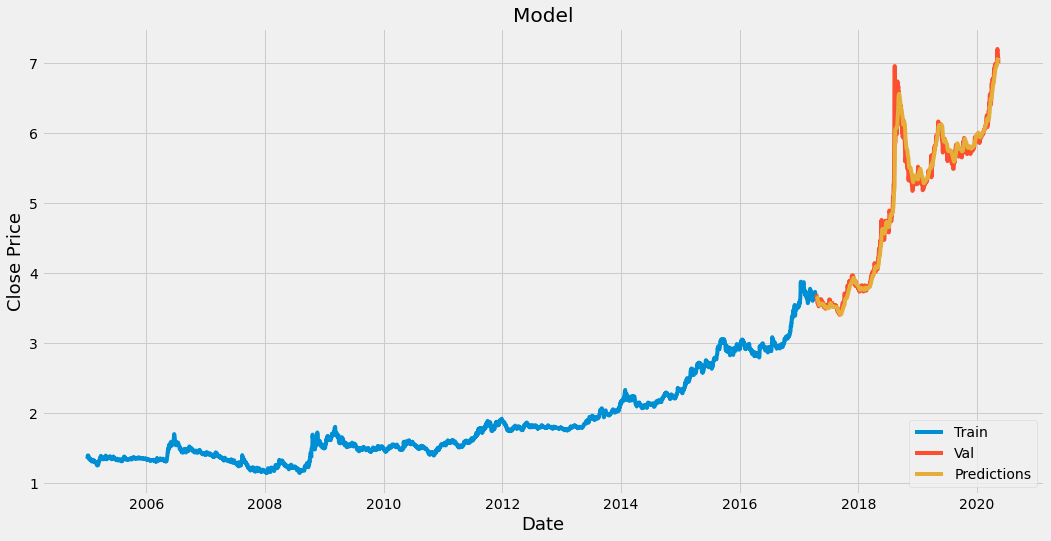

In [98]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [0]:
#Blue : Trained data
#Red : Actual graph
#Yellow: Prediction

In [105]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-04-18,3.65541,3.666157
2017-04-19,3.67185,3.662794
2017-04-20,3.64080,3.661044
2017-04-23,3.61270,3.656264
2017-04-24,3.57515,3.647311
...,...,...
2020-05-06,7.19708,7.007198
2020-05-07,7.08830,7.037749
2020-05-10,7.09400,7.055644


In [108]:
#Get the quote
usd_quote = web.DataReader('USDTRY=X', data_source='yahoo', start='2010-01-01', end='2020-05-14')
#Create a new dataframe
new_df = usd_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the pas t60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data as 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[7.064663]]


In [0]:
#Today is 2020-05-13 and that's prediction for 2020-05-14